In [6]:
import create_nodes
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

areas, buidlings = create_nodes.create_graph()


#numpy array with the average points of all buildings

data = np.array([b.avg_point_arr for b in buidlings])
buidlings
print(data)
for a in data:
    if a[0] <= 0 or a[1] <= 0:
        #remove a
        data = np.delete(data, np.where(data == a), axis=0)

[[52.39209566 13.06573192]
 [52.40368932 13.03562071]
 [52.38990737 13.06639624]
 ...
 [52.4213927  13.01902736]
 [52.42141718 13.01890934]
 [52.42144468 13.01879494]]


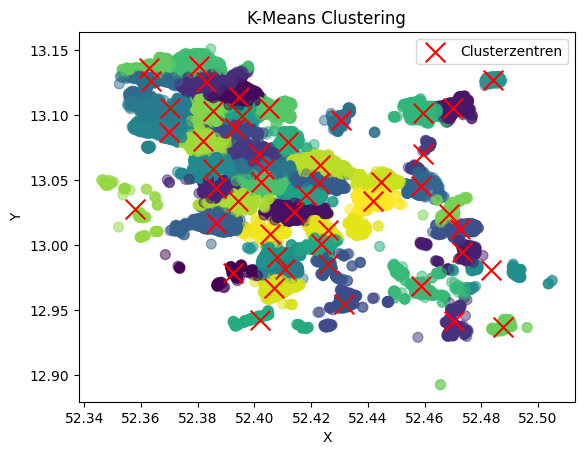

In [21]:
k = 50

kmeans = KMeans(n_clusters=k).fit(data)
# K-Means-Modell erstellen und auf die Punkte anwenden
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_
# Punkte und Clusterzentren plotten
plt.scatter([point[0] for point in data], [point[1] for point in data], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200, label='Clusterzentren')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [22]:
print(kmeans.labels_)

[23 23 23 ... 47 47 47]


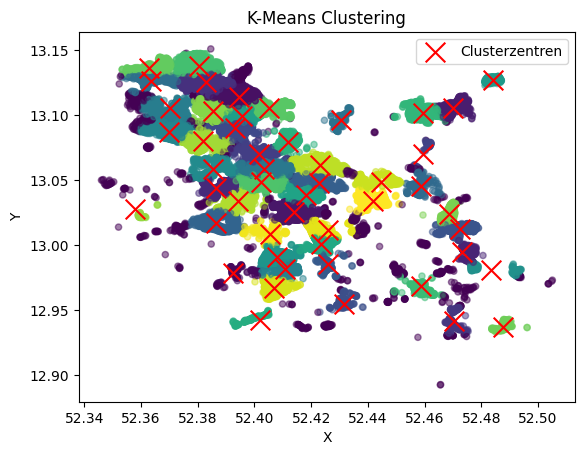

In [24]:
# Distanzen der Punkte zu ihren jeweiligen Clusterzentren berechnen
distances = [np.linalg.norm(point - cluster_centers[label]) for point, label in zip(data, cluster_labels)]
# Mittelwert und Standardabweichung der Distanzen berechnen
mean_distance = np.mean(distances)
std_distance = np.std(distances)
# Ausreißer als Punkte mit einer Distanz größer als der Mittelwert plus 2 Standardabweichungen markieren
# outliers = [point for point, distance in zip(data, distances) if distance > mean_distance + 2 * std_distance]
for i in range(len(distances)):
    if distances[i] > mean_distance + 2 * std_distance:
        cluster_labels[i] = -1
plt.scatter([point[0] for point in data], [point[1] for point in data], c=cluster_labels, cmap='viridis', s=20, alpha=0.5)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200, label='Clusterzentren')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [29]:
# sum the total heating cost for each building of each cluster

total_heating_cost = np.zeros(k+1)
total_building = np.zeros(k+1)
for i in range(len(buidlings)):
    total_heating_cost[cluster_labels[i]] += buidlings[i].winter_heating_consumption.total
    total_building[cluster_labels[i]] += 1

print(total_heating_cost)

AttributeError: 'NoneType' object has no attribute 'total'